# Periodic features

Periodic features are those that repeat their values at regular intervals, like the hour, the days of a week, and the months of a year.

With cyclical or periodic features, values that are very different in absolute magnitude are actually close. For example, January is close to December, even though their absolute magnitude suggests otherwise.

We can use periodic functions like sine and cosine, to transform cyclical features and help machine learning models  pick up their intrinsic nature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create toy data

In [2]:
# Let's create a dataframe with the hour
# from 0 to 23.

df = pd.DataFrame([i for i in range(24)], columns=['hour'])

df.head()

,hour
0,0
1,1
2,2
3,3
4,4


Let's determine the time elapsed between the hours 3 and 1.

In [3]:
df.iloc[3] - df.iloc[1]

hour    2
dtype: int64

As expected, there is a 2 hours difference.

Now, let's determine the difference between 22 hours and midnight, that is 0 hours.

In [4]:
df.iloc[22] - df.iloc[0]

hour    22
dtype: int64

As we see, there is a difference of 22, when we actually know that there is only a 2 hours difference.

How can we make machine learning models better understand the real difference between the values of cyclical features?


# Sin and cosine transformations

In [5]:
# We transform the features with the sine and cosine function.

df["hour_sin"] = np.sin(df["hour"] / df["hour"].max() * 2 * np.pi)

df["hour_cos"] = np.cos(df["hour"] / df["hour"].max() * 2 * np.pi)

df.head()

,hour,hour_sin,hour_cos
0,0,0.000000,1.000000
1,1,0.269797,0.962917
2,2,0.519584,0.854419
3,3,0.730836,0.682553
4,4,0.887885,0.460065


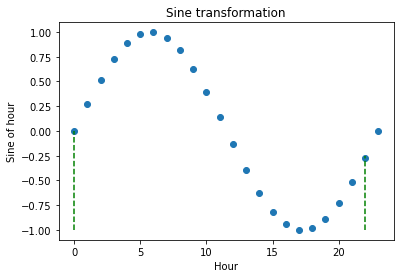

In [6]:
# Plot hour vs its trigonometric transformation.

plt.scatter(df["hour"], df["hour_sin"])

# Axis labels
plt.ylabel('Sine of hour')
plt.xlabel('Hour')
plt.title('Sine transformation')

plt.vlines(x=0, ymin=-1, ymax=0, color='g', linestyles='dashed')
plt.vlines(x=22, ymin=-1, ymax=-0.25, color='g', linestyles='dashed')

After the transformation we see that the hours 0 and 22 are much closer in value.

But, we also observe that the different hours could take the same value after the transformation, see below:

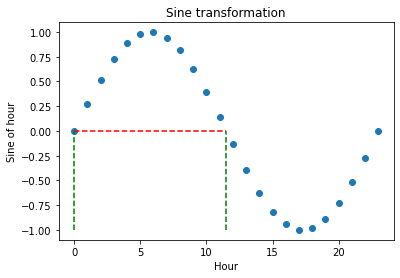

In [7]:
# Plot hour vs its trigonometric transformation.

plt.scatter(df["hour"], df["hour_sin"])

# Axis labels
plt.ylabel('Sine of hour')
plt.xlabel('Hour')
plt.title('Sine transformation')

plt.hlines(y=0, xmin=0, xmax=11.5, color='r', linestyles='dashed')

plt.vlines(x=0, ymin=-1, ymax=0, color='g', linestyles='dashed')
plt.vlines(x=11.5, ymin=-1, ymax=0, color='g', linestyles='dashed')

In the precedent plot, we see the the hours 0 and 11.5 take roughly the same value after the sin transformation.

The same is true for the cosine function, see below:

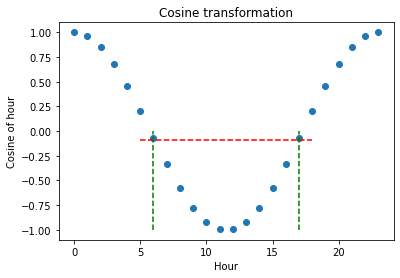

In [8]:
# Plot hour vs its trigonometric transformation.

plt.scatter(df["hour"], df["hour_cos"])

# Axis labels
plt.ylabel('Cosine of hour')
plt.xlabel('Hour')
plt.title('Cosine transformation')

plt.hlines(y=-0.09, xmin=5, xmax=18, color='r', linestyles='dashed')

plt.vlines(x=6, ymin=-1, ymax=0, color='g', linestyles='dashed')
plt.vlines(x=17, ymin=-1, ymax=0, color='g', linestyles='dashed')

In the former plot, we see that the hours 6 and 17 take roughly the same cosine value after the transformation.

How can we distinguish the hours 0 from 11.5 or 6 from 17?

We need to use the 2 transformations together to fully code the information of the hour. Adding the cosine function, which is out-of-phase with the sine function, breaks the symmetry and gives each hour a unique codification. 

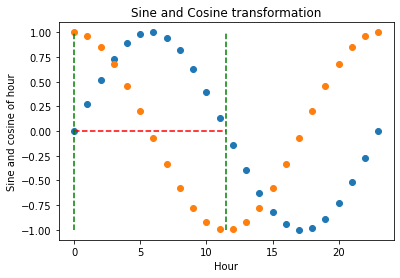

In [9]:
# Plot hour vs its trigonometric transformation.

plt.scatter(df["hour"], df["hour_sin"])
plt.scatter(df["hour"], df["hour_cos"])

# Axis labels
plt.ylabel('Sine and cosine of hour')
plt.xlabel('Hour')
plt.title('Sine and Cosine transformation')


plt.hlines(y=0, xmin=0, xmax=11.5, color='r', linestyles='dashed')

plt.vlines(x=0, ymin=-1, ymax=1, color='g', linestyles='dashed')
plt.vlines(x=11.5, ymin=-1, ymax=1, color='g', linestyles='dashed')

With the values of sine 0 and cosine 1, we can unequivocally identify the hour 0. With the values of sine 0 and cosine -1 we can unequivocally identify the hour 11.5 and so on.

An intuitive way to show the new representation is to plot the sine vs the cosine transformation of the hour. It will show as a 24 hour clock, and now, the distance between two points corresponds to the difference in time as we would expect from a 24-hour cycle.

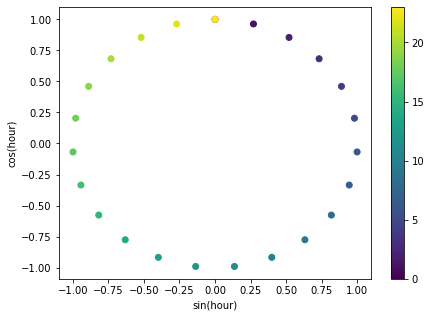

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(df["hour_sin"], df["hour_cos"], c=df["hour"])
ax.set(
    xlabel="sin(hour)",
    ylabel="cos(hour)",
)
_ = fig.colorbar(sp)

Now, we can go ahead and apply this transformation to some real data.

In [11]:
# to automate many of our engineering processes
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures

from sklearn.pipeline import Pipeline

#  Pollutants

Let's work with the air quality dataset that we created in the notebook **03-prepare-air-quality-dataset** which you can find in the folder **01-Create-Datasets** in this repository.

In [12]:
# Function to load and prepare input data.

def load_data():

    # Data lives here.
    filename = '../datasets/AirQualityUCI_ready.csv'

    # Load data: only the time variable and CO
    data = pd.read_csv(filename, usecols=['Date_Time', 'CO_sensor'])

    # Cast date variable in datetime format.
    data['Date_Time'] = pd.to_datetime(data['Date_Time'])

    # Set the index to the timestamp.
    data.index = data['Date_Time']

    # Sanity: sort index.
    data.sort_index(inplace=True)

    # Reduce data span.
    data = data[(
        data['Date_Time'] >= '2004-04-01') &
        (data['Date_Time'] <= '2005-04-30')
    ]

    # Remove outliers
    data = data.loc[(data['CO_sensor'] > 0)]

    return data

In [13]:
# Load data.

data = load_data()

data.head()

,Date_Time,CO_sensor
Date_Time,,
2004-04-04 00:00:00,2004-04-04 00:00:00,1224.0
2004-04-04 01:00:00,2004-04-04 01:00:00,1215.0
2004-04-04 02:00:00,2004-04-04 02:00:00,1115.0
2004-04-04 03:00:00,2004-04-04 03:00:00,1124.0
2004-04-04 04:00:00,2004-04-04 04:00:00,1028.0


## Add temporal features

We will extract year, month and hour from the index.

In [14]:
# Extract month and hour from timestamp

dtf = DatetimeFeatures(
    variables='Date_Time',  # the timestamp
    features_to_extract=["year", "month", "hour"],  # the features to create
    drop_original=True  # if we want to drop the timestamp.
)

# Extract the datetime features
data = dtf.fit_transform(data)

# Show new variables
data.head()

,CO_sensor,Date_Time_year,Date_Time_month,Date_Time_hour
Date_Time,,,,
2004-04-04 00:00:00,1224.0,2004,4,0
2004-04-04 01:00:00,1215.0,2004,4,1
2004-04-04 02:00:00,1115.0,2004,4,2
2004-04-04 03:00:00,1124.0,2004,4,3
2004-04-04 04:00:00,1028.0,2004,4,4


## Hourly pollutant concentration

Text(0.5, 1.0, 'CO concentration in time')

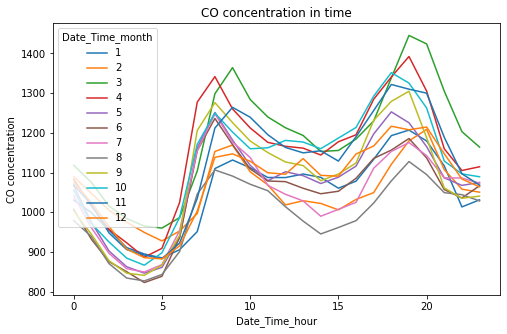

In [15]:
# Mean pollutant concentration per hour.

data.groupby(["Date_Time_hour", "Date_Time_month"])["CO_sensor"].mean().unstack().plot(figsize=(8,5))
plt.ylabel("CO concentration")
plt.title("CO concentration in time")

## Monthly pollutant concentration

Text(0.5, 1.0, 'CO concentration in time')

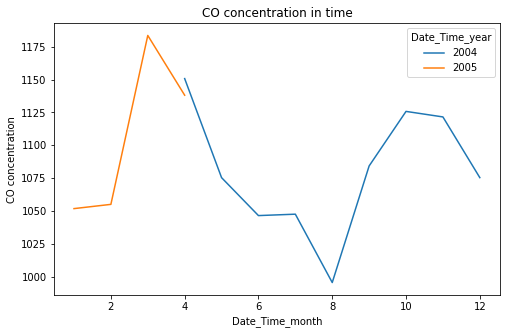

In [16]:
# Mean pollutant concentration per month.

data.groupby(["Date_Time_month", "Date_Time_year"])["CO_sensor"].mean().unstack().plot(figsize=(8,5))
plt.ylabel("CO concentration")
plt.title("CO concentration in time")

We do not have enough information to conclude that there is monthly seasonality. We would need more years of information.

## Periodic transformation

Let's transform the features with the sine and cosine manually.

Text(0.5, 1.0, 'Sine transformation of hour')

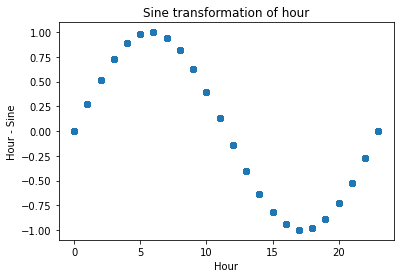

In [17]:
# Transform hour with sine.

data["hour_sin"] = np.sin(data["Date_Time_hour"] /
                          data["Date_Time_hour"].max() * 2 * np.pi)

# Plot.
plt.scatter(data["Date_Time_hour"], data['hour_sin'])

# Axis labels
plt.xlabel('Hour')
plt.ylabel('Hour - Sine')
plt.title('Sine transformation of hour')

Text(0.5, 1.0, 'Cosine transformation of hour')

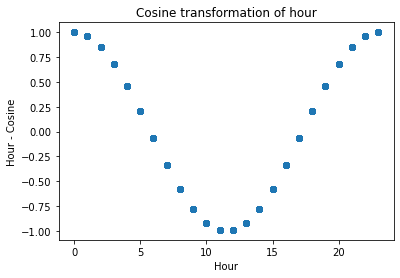

In [18]:
# Transform hour with cosine.
data["hour_cos"] = np.cos(data["Date_Time_hour"] /
                          data["Date_Time_hour"].max() * 2 * np.pi)

# Plot.
plt.scatter(data["Date_Time_hour"], data['hour_cos'])

plt.xlabel('Hour')
plt.ylabel('Hour - Cosine')
plt.title('Cosine transformation of hour')

Text(0.5, 1.0, 'Sine transformation of Month')

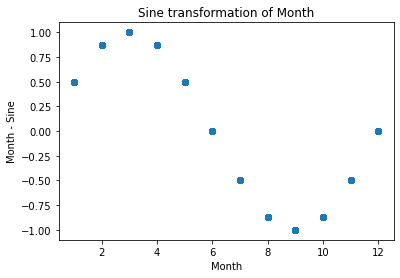

In [19]:
# Transform month with sine.
data["month_sin"] = np.sin(data["Date_Time_month"] /
                          data["Date_Time_month"].max() * 2 * np.pi)

# Plot.
plt.scatter(data["Date_Time_month"], data['month_sin'])

# Axis labels
plt.xlabel('Month')
plt.ylabel('Month - Sine')
plt.title('Sine transformation of Month')

Text(0.5, 1.0, 'Cosine transformation of Month')

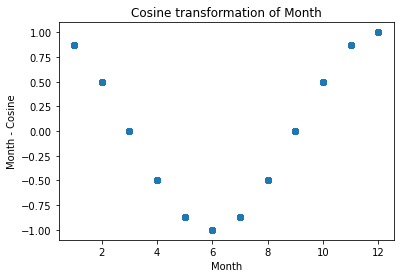

In [20]:
# Transform month with cosine.
data["month_cos"] = np.cos(data["Date_Time_month"] /
                          data["Date_Time_month"].max() * 2 * np.pi)

# Plot.
plt.scatter(data["Date_Time_month"], data['month_cos'])

# Axis labels
plt.xlabel('Month')
plt.ylabel('Month - Cosine')
plt.title('Cosine transformation of Month')

## Automate with Feature-engine

We can extract all the features that we created manually with pandas, automatically, using Feature-engine.

In particular, for periodic features we can use the [CyclicalFeatures](https://feature-engine.readthedocs.io/en/latest/user_guide/creation/CyclicalFeatures.html).

In [21]:
# Load data.

data = load_data()

data.head()

,Date_Time,CO_sensor
Date_Time,,
2004-04-04 00:00:00,2004-04-04 00:00:00,1224.0
2004-04-04 01:00:00,2004-04-04 01:00:00,1215.0
2004-04-04 02:00:00,2004-04-04 02:00:00,1115.0
2004-04-04 03:00:00,2004-04-04 03:00:00,1124.0
2004-04-04 04:00:00,2004-04-04 04:00:00,1028.0


In [22]:
# Get datetime features from the datetime variable
# and apply periodic transformation.

pipe = Pipeline([
    
    # create datetime features.
    ('datetime', DatetimeFeatures(
        variables="Date_Time",
        features_to_extract=["month", "hour"],
        drop_original=True,
    )),

    # apply sine and cosine transformation.
    ('cyclical', CyclicalFeatures(
        variables=["Date_Time_month", "Date_Time_hour"],
    )),
])

In [23]:
# Extract the features.

data = pipe.fit_transform(data)

data.head()

,CO_sensor,Date_Time_month,Date_Time_hour,Date_Time_month_sin,Date_Time_month_cos,Date_Time_hour_sin,Date_Time_hour_cos
Date_Time,,,,,,,
2004-04-04 00:00:00,1224.0,4,0,0.866025,-0.5,0.000000,1.000000
2004-04-04 01:00:00,1215.0,4,1,0.866025,-0.5,0.269797,0.962917
2004-04-04 02:00:00,1115.0,4,2,0.866025,-0.5,0.519584,0.854419
2004-04-04 03:00:00,1124.0,4,3,0.866025,-0.5,0.730836,0.682553
2004-04-04 04:00:00,1028.0,4,4,0.866025,-0.5,0.887885,0.460065


# Compare model performance

Now, let's compare the performance of a model trained with the raw features or the trigonometric transformed features.

**NOTE**: I am going to do a quick and dirty job to prove my point. Keep in mind that we should split the data into a train and a test set or use cross-validation to have an accurate measure of the model performance.

In [24]:
from sklearn.linear_model import Lasso

In [25]:
# Lasso regression.

reg = Lasso(random_state=10)

In [26]:
# Fit Lasso to the raw inputs.

reg.fit(data[["Date_Time_month", "Date_Time_hour"]], data["CO_sensor"])

# Get the R2
reg.score(data[["Date_Time_month", "Date_Time_hour"]], data["CO_sensor"])

0.10359654878036195

In [27]:
# Capture the trigonometrically transformed variables in a list.

trig_vars = [var for var in data.columns if 'sin' in var or 'cos' in var]

trig_vars

['Date_Time_month_sin',
 'Date_Time_month_cos',
 'Date_Time_hour_sin',
 'Date_Time_hour_cos']

In [28]:
# Fit Lasso with transformed inputs.

reg.fit(data[trig_vars], data["CO_sensor"])

# Get the R2.
reg.score(data[trig_vars], data["CO_sensor"])

0.13263074168408584

As we see, with the transformed features we improved the performance of the model by roughly 30%.

More details on working with temporal features in the [Scikit-learn docs](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#trigonometric-features)